In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [58]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [59]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-59.65257551276199, -119.53342523921499),
 (9.006536297696016, -48.88211545567711),
 (22.1042679142584, 133.08124881233158),
 (19.175641653723048, -137.04845949659483),
 (58.92938179524907, -151.98581180922923),
 (25.806187311834478, 11.290254619957864),
 (24.251045515437582, 8.508276339924777),
 (-78.83653423584303, -85.00087266122515),
 (29.856172784009487, 62.58949515374789),
 (-12.42352444177152, -88.59041855482523),
 (51.97952842223694, -137.20627001921594),
 (-3.3005878691876234, 46.98787398785407),
 (25.635139058995236, -80.35150006819846),
 (-49.1379249806183, 69.78836057662156),
 (-9.993679426153676, 27.599191211554768),
 (-19.717567328012137, 138.46820871420243),
 (-21.54170443055706, 132.53907631182204),
 (74.83948181767619, -141.11762094410145),
 (-60.250181586798924, -58.260091975657076),
 (75.48087227779621, -151.4965763501603),
 (52.74819191457419, 35.98908913124268),
 (27.685638522262252, -143.17402242252246),
 (8.632372962756634, 93.3545433788455),
 (59.3462141773692

In [60]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [61]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
cayenne gf
nishihara jp
hilo us
homer us
gat ly
gat ly
ushuaia ar
rudbar af
chicama pe
sitka us
barawe so
palmetto estates us
saint-philippe re
mwense zm
mount isa au
alice springs au
aklavik ca
ushuaia ar
barrow us
znamenka ru
hilo us
port blair in
stornoway gb
chuy uy
cape town za
ushuaia ar
antsohihy mg
vaini to
sorland no
evensk ru
bac lieu vn
port alfred za
nanortalik gl
comodoro rivadavia ar
kamuli ug
saint george bm
hermanus za
inhambane mz
puerto ayora ec
vaini to
katobu id
dikson ru
chapais ca
guerrero negro mx
cape town za
adet et
khatanga ru
tuktoyaktuk ca
tambopata pe
coihaique cl
tuktoyaktuk ca
longyearbyen sj
bambous virieux mu
merauke id
cape town za
northam au
iqaluit ca
qaanaaq gl
yellowknife ca
busselton au
sentyabrskiy ru
souillac mu
illoqqortoormiut gl
nome us
quatre cocos mu
cape town za
ust-ilimsk ru
marzuq ly
krasnoselkup ru
coahuayana mx
tiarei pf
nikolskoye ru
ushuaia ar
busselton au
butaritari ki
zachagansk kz
alofi nu
hilo us
plettenberg bay za
ush

san patricio mx
lompoc us
chokurdakh ru
ushuaia ar
sitka us
awjilah ly
cape town za
bredasdorp za
salalah om
altay cn
rikitea pf
kodiak us
pueblo us
puerto ayora ec
hithadhoo mv
mizan teferi et
mahebourg mu
saldanha za
itarema br
atuona pf
coleraine gb
busselton au
rikitea pf
cabo san lucas mx
tsihombe mg
ushuaia ar
port alfred za
atuona pf
hermanus za
barentsburg sj
airai pw
saleaula ws
fujin cn
virginia beach us
saleaula ws
vila velha br
teya ru
yulin cn
harnai pk
sukumo jp
attawapiskat ca
butaritari ki
lorengau pg
pangnirtung ca
bredasdorp za
punta arenas cl
baruun-urt mn
vaini to
port hardy ca
barawe so
port macquarie au
pisco pe
saint-georges gf
ushuaia ar
hermanus za
rikitea pf
rikitea pf
eregli tr
ushuaia ar
vaini to
ushuaia ar
ushuaia ar
kapaa us
egvekinot ru
nassau bs
butaritari ki
torbay ca
ushuaia ar
kavieng pg
nacala mz
amderma ru
fukue jp
kapoeta sd
sao filipe cv
ancud cl
longyearbyen sj
saleaula ws
zhigansk ru
victoria sc
hilo us
hithadhoo mv
rikitea pf
ushuaia ar
angoche

In [38]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [39]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | vicksburg
Processing Record 6 of Set 1 | tshikapa
Processing Record 7 of Set 1 | duluth
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | kyzyl-suu
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | saurimo
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | faanui
Processing Record 23

Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | nelson bay
Processing Record 42 of Set 4 | maraa
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | saint-paul
Processing Record 45 of Set 4 | batagay-alyta
Processing Record 46 of Set 4 | wloszczowa
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | kayankulam
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | ocean city
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | tevaitoa
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | nkawkaw
Processing Record 9 of Set 5 | saleaula


Processing Record 23 of Set 8 | nowy dwor gdanski
Processing Record 24 of Set 8 | liverpool
Processing Record 25 of Set 8 | nedjo
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | acari
Processing Record 29 of Set 8 | morrope
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | paramonga
Processing Record 33 of Set 8 | preobrazheniye
Processing Record 34 of Set 8 | kovdor
Processing Record 35 of Set 8 | neryungri
Processing Record 36 of Set 8 | diego de almagro
Processing Record 37 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | staritsa
Processing Record 40 of Set 8 | tessalit
Processing Record 41 of Set 8 | seinajoki
Processing Record 42 of Set 8 | ambulu
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | narsaq
Processing Record 45 of 

Processing Record 13 of Set 12 | pitimbu
Processing Record 14 of Set 12 | beringovskiy
Processing Record 15 of Set 12 | bintulu
Processing Record 16 of Set 12 | lagos
Processing Record 17 of Set 12 | babynino
Processing Record 18 of Set 12 | zhanaozen
Processing Record 19 of Set 12 | san pablo tacachico
Processing Record 20 of Set 12 | saint stephen
Processing Record 21 of Set 12 | cockburn town
Processing Record 22 of Set 12 | tabas
Processing Record 23 of Set 12 | amahai
Processing Record 24 of Set 12 | wa
City not found. Skipping...
Processing Record 25 of Set 12 | verkhoshizhemye
Processing Record 26 of Set 12 | sakaiminato
Processing Record 27 of Set 12 | kayerkan
Processing Record 28 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 12 | wasilla
Processing Record 30 of Set 12 | general higinio morinigo
Processing Record 31 of Set 12 | chernyshevskiy
Processing Record 32 of Set 12 | xining
Processing Record 33 of Set 12 | dargaville
Processing Record 34 o

In [46]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | vicksburg
Processing Record 6 of Set 1 | tshikapa
Processing Record 7 of Set 1 | duluth
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | kyzyl-suu
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | saurimo
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | faanui
Processing Record 23 of Set 1 | celina
Processing Record 24 of Set 1 | bur gabo


City not found. Skipping...
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | nelson bay
Processing Record 42 of Set 4 | maraa
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | saint-paul
Processing Record 45 of Set 4 | batagay-alyta
Processing Record 46 of Set 4 | wloszczowa
Processing Record 47 of Set 4 | marsh harbour
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | kayankulam
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | ocean city
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | tevaitoa
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | hami
Processing Record 8 of Set 5 | nkawkaw
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | waitati
Processing Record 11

Processing Record 25 of Set 8 | nedjo
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | acari
Processing Record 29 of Set 8 | morrope
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | paramonga
Processing Record 33 of Set 8 | preobrazheniye
Processing Record 34 of Set 8 | kovdor
Processing Record 35 of Set 8 | neryungri
Processing Record 36 of Set 8 | diego de almagro
Processing Record 37 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | staritsa
Processing Record 40 of Set 8 | tessalit
Processing Record 41 of Set 8 | seinajoki
Processing Record 42 of Set 8 | ambulu
Processing Record 43 of Set 8 | guerrero negro
Processing Record 44 of Set 8 | narsaq
Processing Record 45 of Set 8 | los corrales de buelna
Processing Record 46 of Set 8 | tukrah
Processing Record 47 o

Processing Record 16 of Set 12 | lagos
Processing Record 17 of Set 12 | babynino
Processing Record 18 of Set 12 | zhanaozen
Processing Record 19 of Set 12 | san pablo tacachico
Processing Record 20 of Set 12 | saint stephen
Processing Record 21 of Set 12 | cockburn town
Processing Record 22 of Set 12 | tabas
Processing Record 23 of Set 12 | amahai
Processing Record 24 of Set 12 | wa
City not found. Skipping...
Processing Record 25 of Set 12 | verkhoshizhemye
Processing Record 26 of Set 12 | sakaiminato
Processing Record 27 of Set 12 | kayerkan
Processing Record 28 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 29 of Set 12 | wasilla
Processing Record 30 of Set 12 | general higinio morinigo
Processing Record 31 of Set 12 | chernyshevskiy
Processing Record 32 of Set 12 | xining
Processing Record 33 of Set 12 | dargaville
Processing Record 34 of Set 12 | eldorado
Processing Record 35 of Set 12 | ketchikan
Processing Record 36 of Set 12 | bemidji
Processing Record 37 of 

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,40.32,87,97,4.61,ZA,2021-07-25 02:22:57
1,Ushuaia,-54.8000,-68.3000,38.86,75,75,2.30,AR,2021-07-25 02:22:57
2,Nanortalik,60.1432,-45.2371,42.66,95,97,9.95,GL,2021-07-25 02:22:58
3,Kavieng,-2.5744,150.7967,84.24,71,11,7.76,PG,2021-07-25 02:22:58
4,Vicksburg,32.3526,-90.8779,84.70,89,1,0.00,US,2021-07-25 02:22:01
5,Tshikapa,-6.4167,20.8000,68.85,42,1,1.52,CD,2021-07-25 02:22:59
6,Duluth,46.7833,-92.1066,75.20,56,1,8.05,US,2021-07-25 02:22:59
7,Lompoc,34.6391,-120.4579,75.34,80,90,11.50,US,2021-07-25 02:22:59
8,Atuona,-9.8000,-139.0333,78.39,70,16,17.27,PF,2021-07-25 02:23:00
9,Butaritari,3.0707,172.7902,83.95,72,13,12.24,KI,2021-07-25 02:23:00


In [63]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-07-25 02:22:57,-34.5322,20.0403,40.32,87,97,4.61
1,Ushuaia,AR,2021-07-25 02:22:57,-54.8000,-68.3000,38.86,75,75,2.30
2,Nanortalik,GL,2021-07-25 02:22:58,60.1432,-45.2371,42.66,95,97,9.95
3,Kavieng,PG,2021-07-25 02:22:58,-2.5744,150.7967,84.24,71,11,7.76
4,Vicksburg,US,2021-07-25 02:22:01,32.3526,-90.8779,84.70,89,1,0.00
...,...,...,...,...,...,...,...,...,...
576,Nova Olimpia,BR,2021-07-25 02:26:01,-14.7972,-57.2881,74.80,44,0,4.36
577,Nizhniy Kuranakh,RU,2021-07-25 02:26:01,58.8353,125.4869,70.00,70,100,4.00
578,Marawi,PH,2021-07-25 02:26:02,7.9986,124.2928,82.45,56,16,6.80
579,Egvekinot,RU,2021-07-25 02:26:02,66.3167,-179.1667,50.00,85,100,4.56


In [64]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [65]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

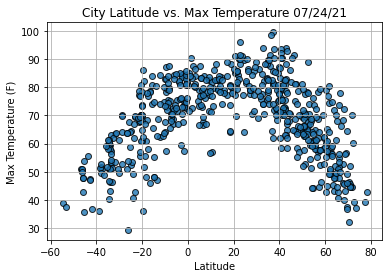

In [66]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

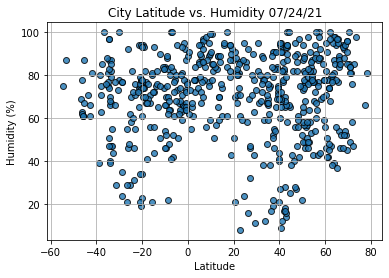

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

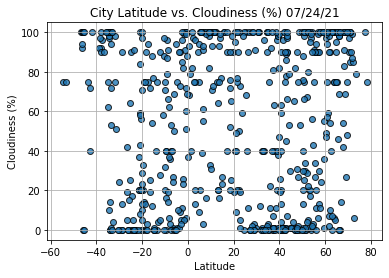

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

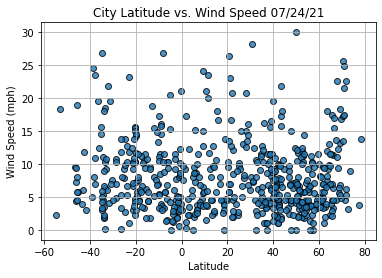

In [69]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [72]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

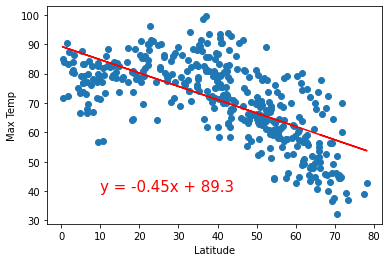

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

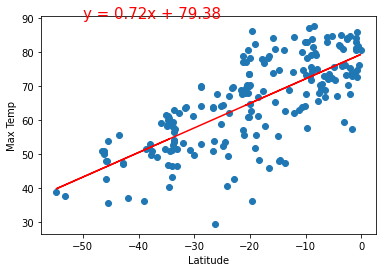

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

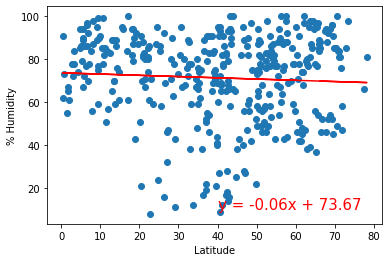

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

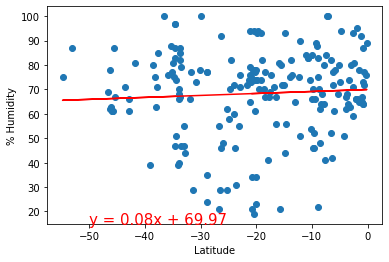

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

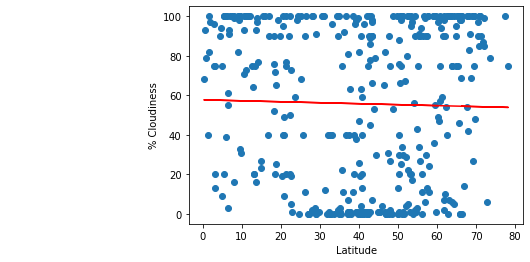

In [81]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

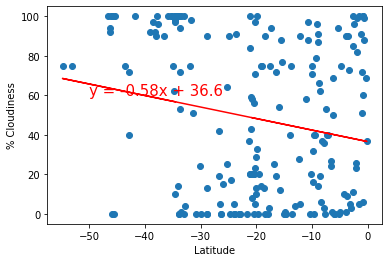

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

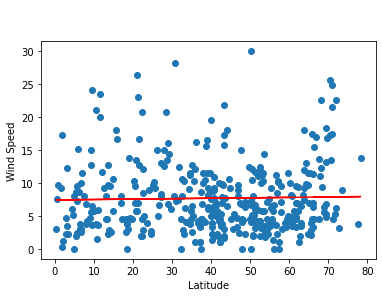

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

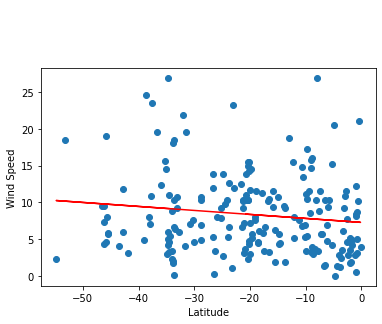

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))